In [91]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the dataset and splitting data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# The Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set a style for plots
plt.style.use('seaborn-v0_8-whitegrid')

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

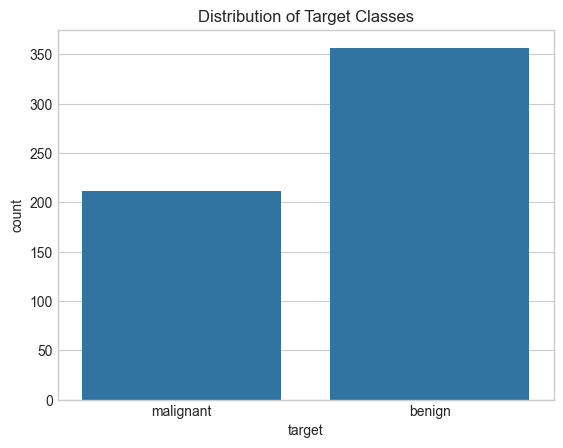

In [92]:
# Load the dataset
cancer = load_breast_cancer()

# Create a pandas DataFrame for easier manipulation
# Features are in cancer.data and the target is in cancer.target
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the DataFrame
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the distribution of the target variable (0: Malignant, 1: Benign)
print("\nTarget variable distribution:")
sns.countplot(x='target', data=df)
plt.xticks([0, 1], cancer.target_names)
plt.title('Distribution of Target Classes')
plt.show()

In [93]:
# Separate features (x) and target (y)
x = df.drop('target', axis=1)
y = df['target']

# split 20% for testing
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

# split from the 80%, split into training and validation sets
# This results in 75% of the 80% for training (60% of total) and 25% for validation (20% of total)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Total data shape: {x.shape}")
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")

Total data shape: (569, 30)
Training data shape: (341, 30)
Validation data shape: (114, 30)
Test data shape: (114, 30)


In [94]:
# Initialize the Random Forest Classifier
# n_estimators is the number of trees in the forest.
# random_state ensures reproducibility.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(x_train, y_train)

print("Random Forest model has been trained successfully!")

Random Forest model has been trained successfully!


Validation Accuracy: 0.9561

Validation Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Validation Confusion Matrix:


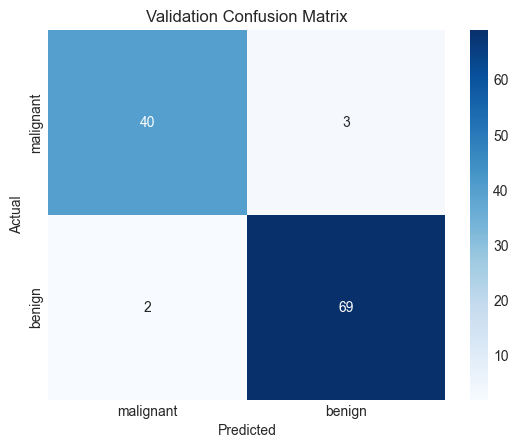

In [95]:
# Make predictions on the validation data
y_val_pred = rf_model.predict(x_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}\n")

# Display the classification report
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=cancer.target_names))

# Display the confusion matrix
print("Validation Confusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

Final Test Accuracy: 0.9474

Test Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Test Confusion Matrix:


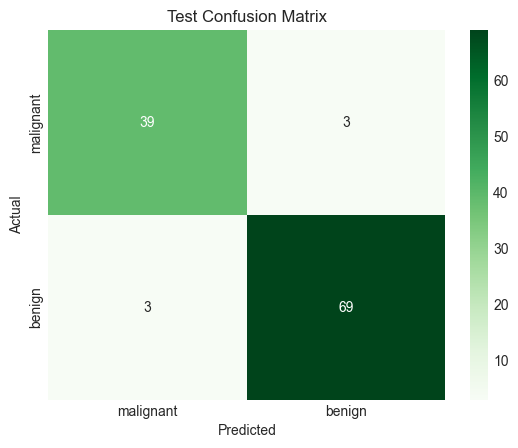

In [96]:
# Make predictions on the final test data
y_test_pred = rf_model.predict(x_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy:.4f}\n")

# Display the classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=cancer.target_names))

# Display the confusion matrix for the test set
print("Test Confusion Matrix:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

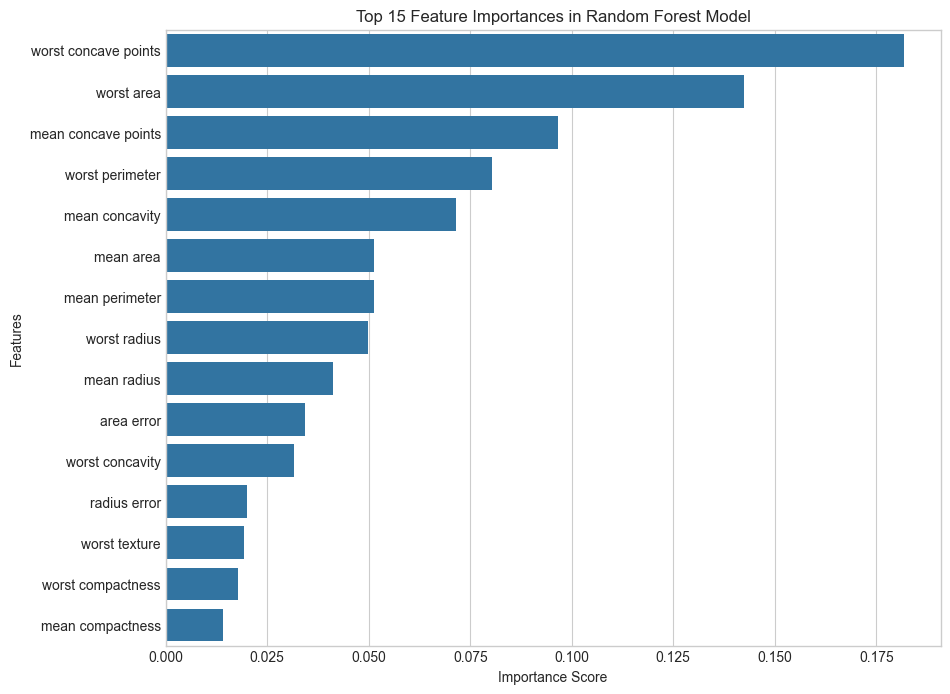

In [97]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Plot top 15 features
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [98]:
# For feature scaling
from sklearn.preprocessing import StandardScaler

# The Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the validation and test data using the same scaler
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

print("Data has been scaled successfully.")

Data has been scaled successfully.


In [100]:
# Initialize the Logistic Regression model
# We set max_iter to a higher value to ensure convergence.
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the scaled training data
log_reg_model.fit(x_train_scaled, y_train)

print("Logistic Regression model has been trained successfully!")

Logistic Regression model has been trained successfully!


Validation Accuracy: 0.9912

Validation Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Validation Confusion Matrix:


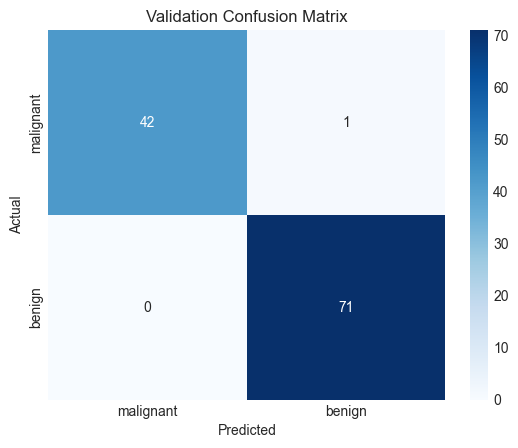

In [101]:
# Make predictions on the scaled validation data
y_val_pred = log_reg_model.predict(x_val_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}\n")

# Display the classification report
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=cancer.target_names))

# Display the confusion matrix
print("Validation Confusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

Final Test Accuracy: 0.9825

Test Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test Confusion Matrix:


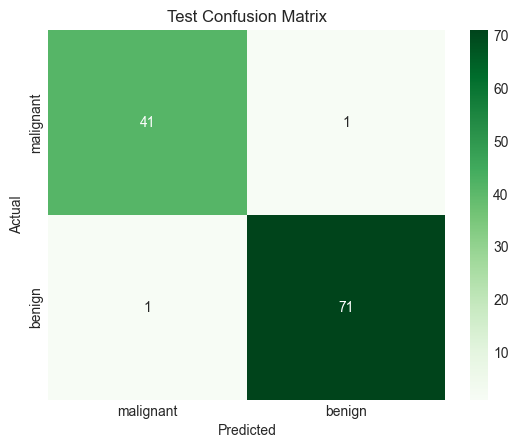

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the scaled test data
y_test_pred = log_reg_model.predict(x_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy:.4f}\n")

# Display the classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=cancer.target_names))

# Display the confusion matrix for the test set
print("Test Confusion Matrix:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

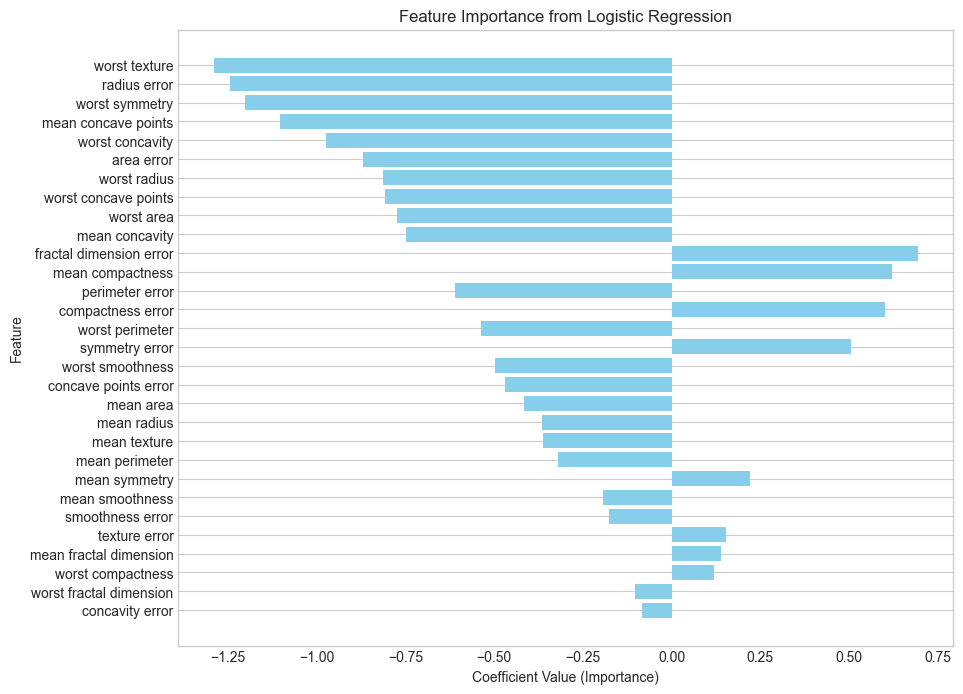

In [82]:
# The model.coef_ is a 2D array, so we use [0] to get the coefficients for the single class
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort by the absolute value of importance to see the most impactful features
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=True)

# 5. Plot the Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.grid(axis='x')
plt.show()